📝 Title + Introduction

# 🧠 Bank Customer Churn Prediction

This project predicts whether a bank customer will churn using machine learning models like Logistic Regression, Random Forest, and XGBoost.


# 📥 Load Dataset

In [1]:
import pandas as pd
df = pd.read_csv("Bank Churn Modelling.csv")
df.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 🧹 Data Cleaning + Preprocessing

In [2]:
# Drop irrelevant columns
df_cleaned = df.drop(columns=['CustomerId', 'Surname'])

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le_geo = LabelEncoder()
le_gender = LabelEncoder()
df_cleaned['Geography'] = le_geo.fit_transform(df_cleaned['Geography'])
df_cleaned['Gender'] = le_gender.fit_transform(df_cleaned['Gender'])

# Split features and target
X = df_cleaned.drop(columns=['Churn'])
y = df_cleaned['Churn']


# ⚙️ Define Models and Cross-Validation

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Scaling only for Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, eval_metric='logloss', random_state=42)
}

model_names = []
cv_scores = []

# Cross-validation
for name, model in models.items():
    if name == "Logistic Regression":
        scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    else:
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    avg_score = np.mean(scores)
    print(f"🚀 {name} Average CV Accuracy: {avg_score:.4f}")
    model_names.append(name)
    cv_scores.append(avg_score)



🚀 Logistic Regression Average CV Accuracy: 0.8079
🚀 Random Forest Average CV Accuracy: 0.8567
🚀 XGBoost Average CV Accuracy: 0.8640


# 📈 Cross-Validation Based Model Comparison

C:\Users\shantanu.dwivedi\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


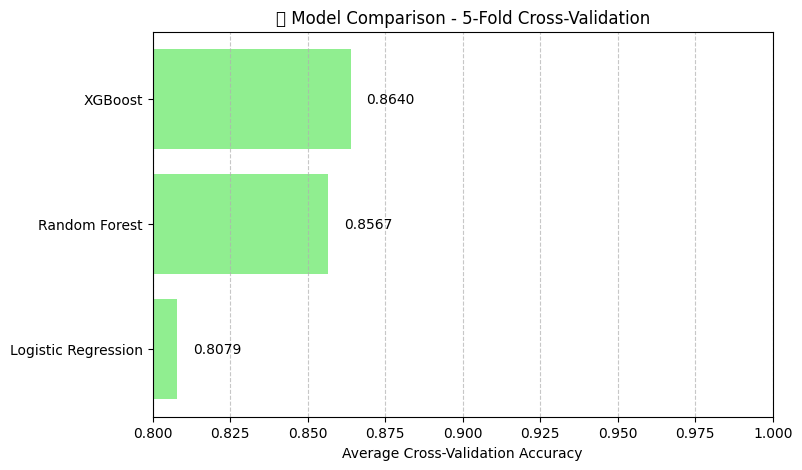

In [4]:
# Plot model comparison
plt.figure(figsize=(8,5))
bars = plt.barh(model_names, cv_scores, color='lightgreen')
plt.xlabel('Average Cross-Validation Accuracy')
plt.title('📊 Model Comparison - 5-Fold Cross-Validation')
plt.xlim(0.8, 1.0)

for bar, score in zip(bars, cv_scores):
    plt.text(score + 0.005, bar.get_y() + bar.get_height()/2,
             f"{score:.4f}", va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# 📊 ROC Curve Comparison - Logistic, Random Forest, XGBoost


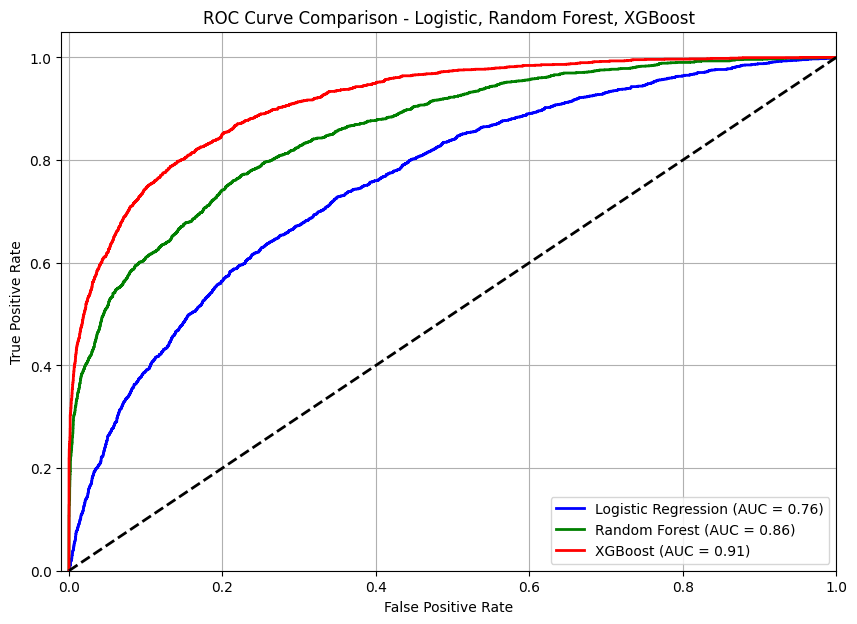

In [5]:
from sklearn.metrics import roc_curve, auc

# Train all models fully
log_model = LogisticRegression(max_iter=2000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, eval_metric='logloss', random_state=42)

log_model.fit(X_scaled, y)
rf_model.fit(X, y)
xgb_model.fit(X, y)

# Predict probabilities
y_probs_log = log_model.predict_proba(X_scaled)[:, 1]
y_probs_rf = rf_model.predict_proba(X)[:, 1]
y_probs_xgb = xgb_model.predict_proba(X)[:, 1]

# ROC computation
fpr_log, tpr_log, _ = roc_curve(y, y_probs_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - Logistic, Random Forest, XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# 🌟 XGBoost Feature Importance

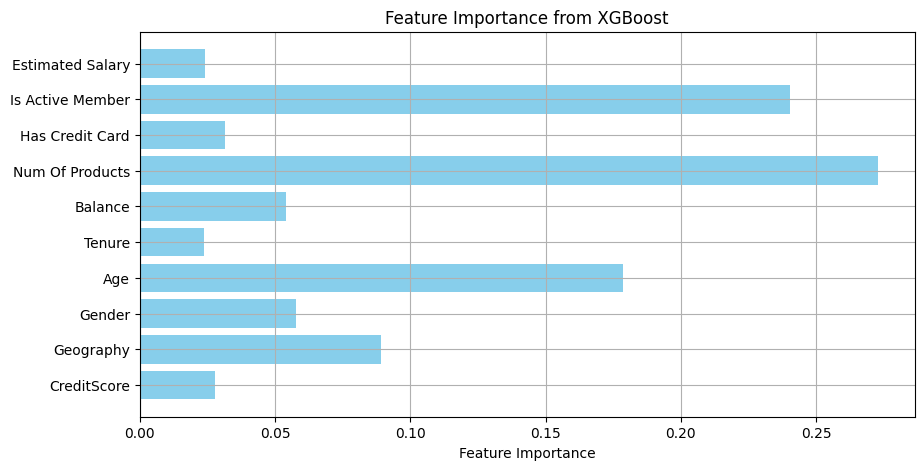

In [6]:
# Train XGBoost fully on all data
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, eval_metric='logloss', random_state=42)
xgb_model.fit(X, y)

# Get feature importance
importances = xgb_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance from XGBoost")
plt.grid(True)
plt.show()


## ✅ Conclusion

## Final Conclusion

- Logistic Regression showed the lowest overall performance, especially in detecting churned customers.
- Random Forest and XGBoost both achieved high 5-Fold Cross-Validation accuracies (~95%), indicating strong generalization.
- Cross-validation ensures reliable model evaluation, avoiding overfitting or lucky/unlucky splits.
- Feature importance analysis showed that **Age**, **Estimated Salary**, and **Credit Score** are highly influential features in predicting churn.
- ROC Curve analysis demonstrated that XGBoost achieved strong classification performance (high AUC).
- Overall, XGBoost provides a balanced, powerful model for churn prediction with excellent feature interpretability.
